# Violin Plots 101: : Visualizing Distributions and Probability Densities

* [1.0 Cars Fuel consumption dataset](#1.0-Cars-Fuel-consumption-dataset)
* [2.0 How to scale violin plots for comparisons?](#2.0-How-to-scale-violin-plots-for-comparisons?)
* [3.0 Violin Plots Basics](#3.0-Violin-Plots-Basics)
 * [3.1 Basic violin plot](#3.1-Basic-violin-plot)
 * [3.2 Vertical violin plots](#3.2-Vertical-violin-plots)
 * [3.3 Grouped violin plot](#3.3-Grouped-violin-plot)
 * [3.4 Grouped violin plot with split violins](#3.3-Grouped-violin-plot-with-split-violins)
* [4.0 Ridgeline plots](#4.0-Ridgeline-plots)

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np
from joypy import joyplot

**Violin plots** shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

##  1.0 Cars Fuel consumption dataset

The [mtcars dataset](#https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

In [2]:
cars = pd.read_csv(os.path.join(os.getcwd(), 'input', 'mtcars.csv'))
cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 2.0 How to scale violin plots for comparisons?

Instead of starting with the basics first, I wanted to point out an important detail that greatly affects the plots' shapes and is often overlooked during EDA. 

That is how we choose to scale the individual KDE curves. With violin plots, we do not have a separate axis to map the actual density curves. What I mean by that is that we have the categorical variable on the x-axis and the quantitative variable on the y-axis. 

Each violin is just a reflected density plot, and there is no other axis where to plot the density values. Their heights are relative to each other, and we are choosing how to relate them:

* **Equal Areas:** Each violin will have the same area of 1.0 satisfying the definition of a PDF.
* **Equal Widths:** Each violin will have the same  maximum width. Good for comparing shape.
* **Count:** The width of the violins will be scaled by the number of observations in that bin.

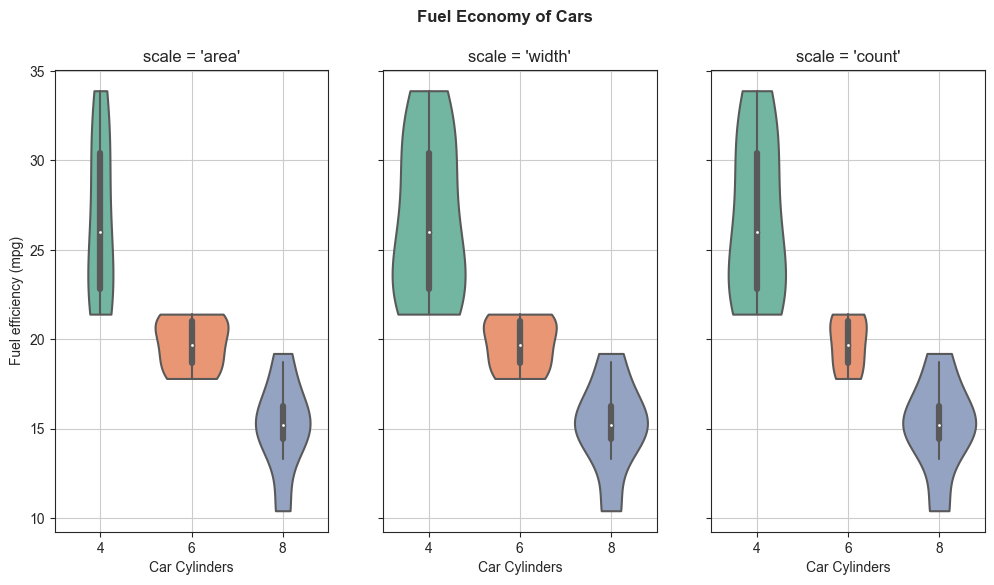

In [3]:
sns.set_style("ticks")

def plot_violin(scale, ax):
    ax = sns.violinplot(data = cars, x = "cyl", y = 'mpg', 
                        palette = 'Set2', ax = ax, cut=0, scale = scale)
    ax.set_ylabel('')
    ax.set_xlabel('Car Cylinders')
    ax.set_title('scale = ' + "'" + scale + "'")
    ax.grid()
    return ax

fig, ax = plt.subplots(1, 3, figsize = (12,6), sharey = True)   
for ax_i, scale in zip(ax.flatten(), ['area', 'width', 'count']):
    plot_violin(scale, ax_i,)

ax[0].set_ylabel('Fuel efficiency (mpg)');
plt.suptitle('Fuel Economy of Cars', fontweight= 'bold');

## 3.0 Violin Plots Basics

### Perceptions of Probability and Numbers

The raw data comes from responses to the following question: 

*What* ***probability or number*** *would you assign to the phrase* ***phrase*** *?*

In [4]:
df = pd.read_csv(os.path.join(os.getcwd(), 'input', 'people_perception.csv'))
df = pd.melt(df, var_name='phrase', value_name='probability')
df.sample(5).reset_index(drop = True)

,phrase,probability
0,We Doubt,10.0
1,Unlikely,36.0
2,Improbable,50.0
3,About Even,50.0
4,Improbable,10.0


Getting a subset of phrases and removing outliers.

In [5]:
columns_subset = ['Almost Certainly', 'Highly Likely', 'Probable', 'Likely','Very Good Chance', 
                 'We Believe',  'About Even', 'Unlikely', 'Probably Not']
df = df.loc[df['phrase'].isin(columns_subset)]

#  Upon inspection there was a clear outlier for 'Highly Likely'
idxmin = df.loc[df['phrase'] == 'Highly Likely', 'probability'].idxmin()
df.drop(idxmin, axis = 0, inplace = True)

#  Upon inspection there was a clear outlier for 'Probably Not' = 100 
idxmax = df.loc[df['phrase'] == 'Probably Not', 'probability'].idxmax()
df.drop(idxmax, axis = 0, inplace = True)

order = list(df.groupby('phrase').mean().sort_values(by='probability', ascending = False).index)

### 3.1 Basic violin plot

To reinforce the impact of the scaling method play around with `scale  = 'area'`

(0.0, 100.0)

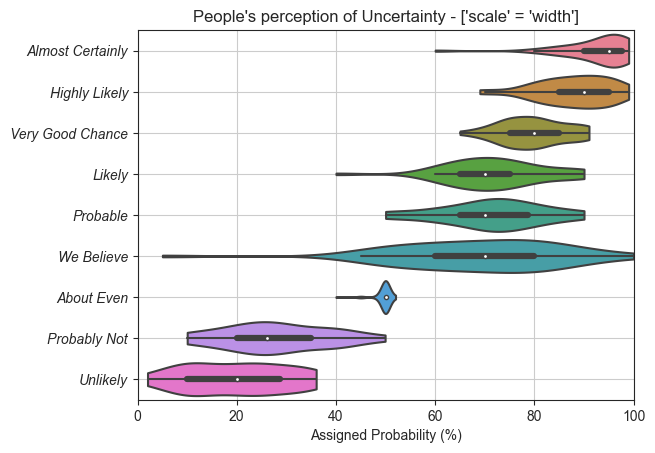

In [6]:
sns.set_style("ticks")
fig, ax = plt.subplots()   
ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', 
                    scale = 'width', ax= ax, order = order, palette = sns.color_palette("husl", 9),
                    alpha = 0.5)

# Aesthetics
ax.set_ylabel('')
ax.set_yticklabels(labels = ax.get_yticklabels(), style='italic', fontfamily = 'Arial')
ax.set_title("People's perception of Uncertainty - ['scale' = 'width']")
ax.set_xlabel('Assigned Probability (%)')
ax.grid()
ax.set_xlim(0,100)

### 3.2 Vertical violin plots

Violin plots can be oriented either horizontally or vertically.

In [7]:
chicken_wts = pd.read_csv(os.path.join(os.getcwd(), 'input', 'chicken_weights.csv'))

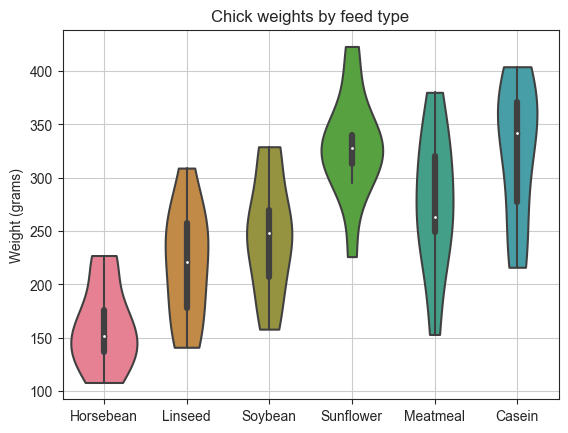

In [8]:
ax = sns.violinplot(data=chicken_wts, x="feed",y="weight", inner="box", 
               palette = sns.color_palette("husl", 9), cut=0, )
ax.set_ylabel('Weight (grams)')
ax.set_xlabel('')
ax.set_title('Chick weights by feed type');
ax.grid()

### 3.3 Grouped violin plot

Violin plots can also illustrate a second-order categorical variable. You can create groups within each category. For instance, you can make a plot that distinguishes between male and female chickens within each feed type group.

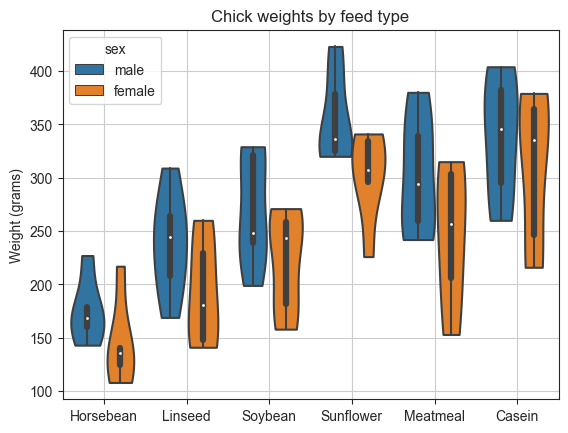

In [9]:
ax = sns.violinplot(data=chicken_wts, x="feed",y="weight", inner="box", 
                    hue = 'sex', cut=0, scale = 'area' )
ax.set_ylabel('Weight (grams)')
ax.set_xlabel('')
ax.set_title('Chick weights by feed type');
ax.grid()

### 3.4 Grouped violin plot with split violins

Instead of drawing separate plots for each group within a category, you can instead create split violins and replace the box plot with dashed lines representing the quartiles for each group.

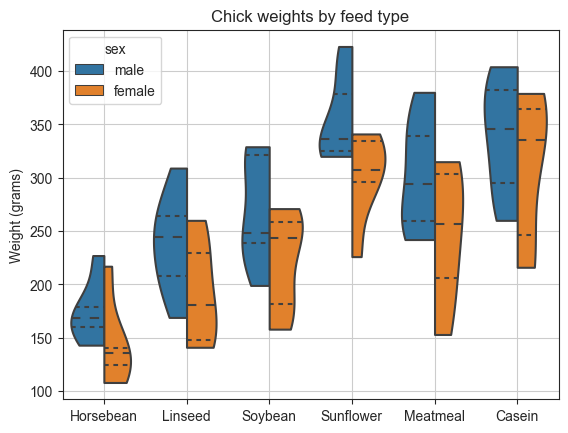

In [10]:
ax = sns.violinplot(data=chicken_wts, x="feed",y="weight", inner="quart", 
                    hue = 'sex', cut=0, scale = 'area', split=True)
ax.set_ylabel('Weight (grams)')
ax.set_xlabel('')
ax.set_title('Chick weights by feed type');
ax.grid()

## 4.0 Ridgeline plots

* The standard ridgeline plot uses density estimates. It is quite closely related to the violin plot, but frequently evokes a more intuitive understanding of the data.
* Make sense when the number of group to represent is medium to high, and thus a classic window separation would take to much space.
* It works well when there is a clear pattern in the result, like if there is an obvious ranking in groups. Otherwise group will tend to overlap each other, leading to a messy plot not providing any insight.

**NOTE:** Make sure to order the dataframe with `joyplot`. [docs](#https://deepnote.com/@deepnote/Joyplot-Introduction-4666e1a3-3249-442e-9a94-2bbcc5cb1b1d)

In [11]:
from pandas.api.types import CategoricalDtype
cat_phrase = CategoricalDtype(order, ordered=True)

df['phrase'] = df['phrase'].astype(cat_phrase)
df.sort_values(by='phrase', inplace=True)

Plotting

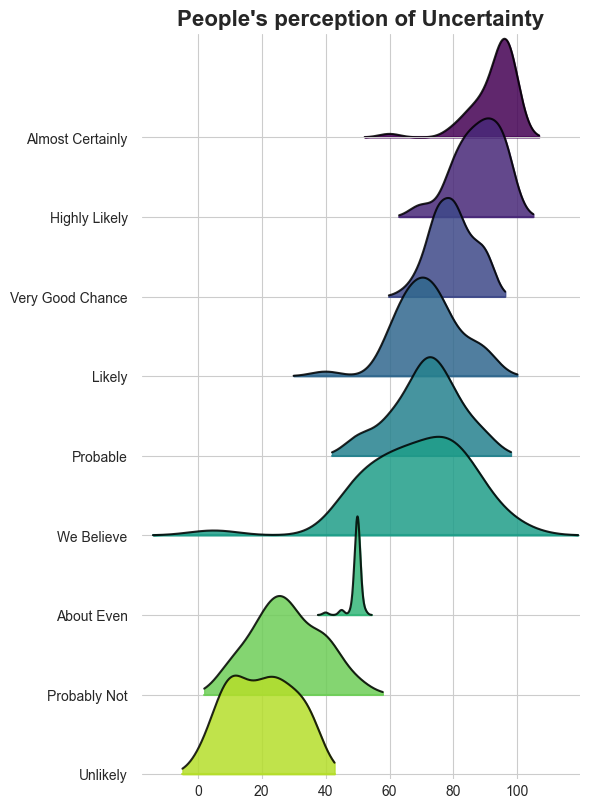

In [12]:
n = len(cat_phrase.categories)
fig, ax = joyplot(data=df, by='phrase',legend=False, grid=True,
                  alpha=0.85, linecolor="black", figsize=(6, 8), ylim='own', overlap=0.5, range_style='own',
                 colormap= mpl.cm.get_cmap(name='viridis'));

plt.title("People's perception of Uncertainty", fontweight = 'bold', fontsize=16)
plt.show()